In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Download latest version
dataset_path = kagglehub.dataset_download("karimabdulnabi/fruit-classification10-class")
print("Path to dataset files:", dataset_path)

dataset_path_obj = Path(dataset_path)
print(f"Существует ли путь: {dataset_path_obj.exists()}")

c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\karimabdulnabi\fruit-classification10-class\versions\1
Существует ли путь: True



Успешно обработано 64 изображений


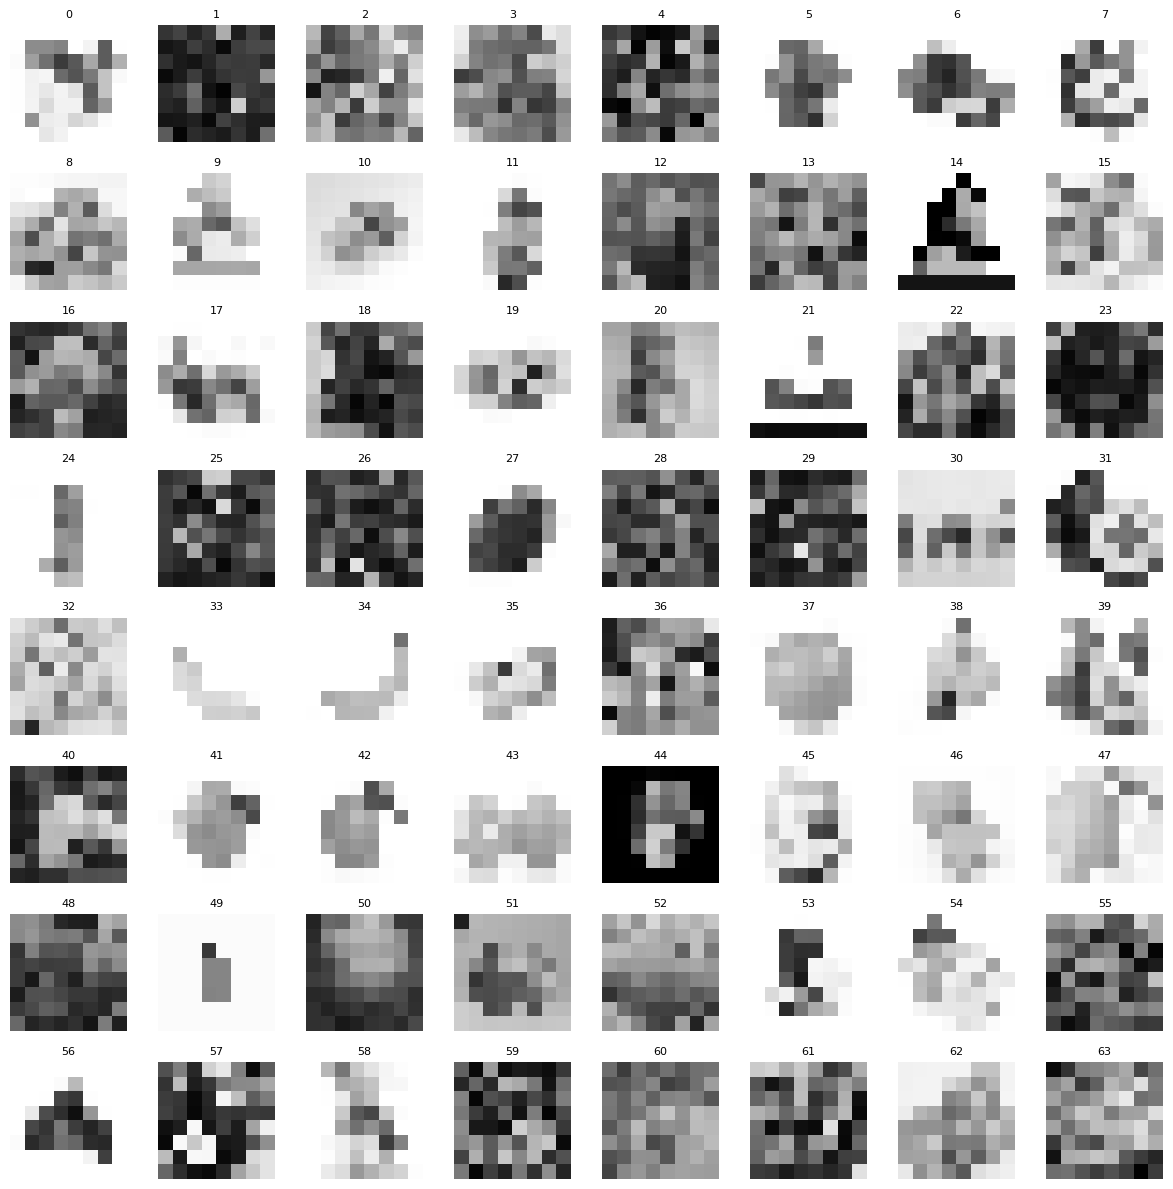

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def process_fruit_images(input_folder, output_folder):
    
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(Path(input_folder).rglob(f'*{ext}'))
        image_files.extend(Path(input_folder).rglob(f'*{ext.upper()}'))
    
    processed_images = []
    
    for i, image_path in enumerate(image_files[:64]):
        try:
            img = cv2.imread(str(image_path))
            if img is None:
                continue
            
            # Серый цвет
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Ресайзинг до 8x8 с интерполяцией
            resized = cv2.resize(gray, (8, 8), interpolation=cv2.INTER_LINEAR)
            
            output_path = os.path.join(output_folder, f'processed_{i:03d}.png')
            cv2.imwrite(output_path, resized)
            
            processed_images.append(resized)
                        
        except Exception as e:
            print(f"Ошибка при обработке {image_path}: {e}")
    
    return processed_images

def visualize_all_images(processed_images):
    
    if len(processed_images) == 0:
        print("Нет обработанных изображений для визуализации")
        return
    
    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    
    for i in range(64):
        if i < len(processed_images):
            row = i // 8
            col = i % 8
            axes[row, col].imshow(processed_images[i], cmap='gray', vmin=0, vmax=255)
            axes[row, col].set_title(f'{i}', fontsize=8)
            axes[row, col].axis('off')
        else:
            row = i // 8
            col = i % 8
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    input_folder = kagglehub.dataset_download("karimabdulnabi/fruit-classification10-class")
    output_folder = "processed_fruits"
        
    processed_images = process_fruit_images(input_folder, output_folder)
    
    if processed_images:
        print(f"\nУспешно обработано {len(processed_images)} изображений")
        
        visualize_all_images(processed_images)
                
if __name__ == "__main__":
    main()


Успешно обработано 64 изображений


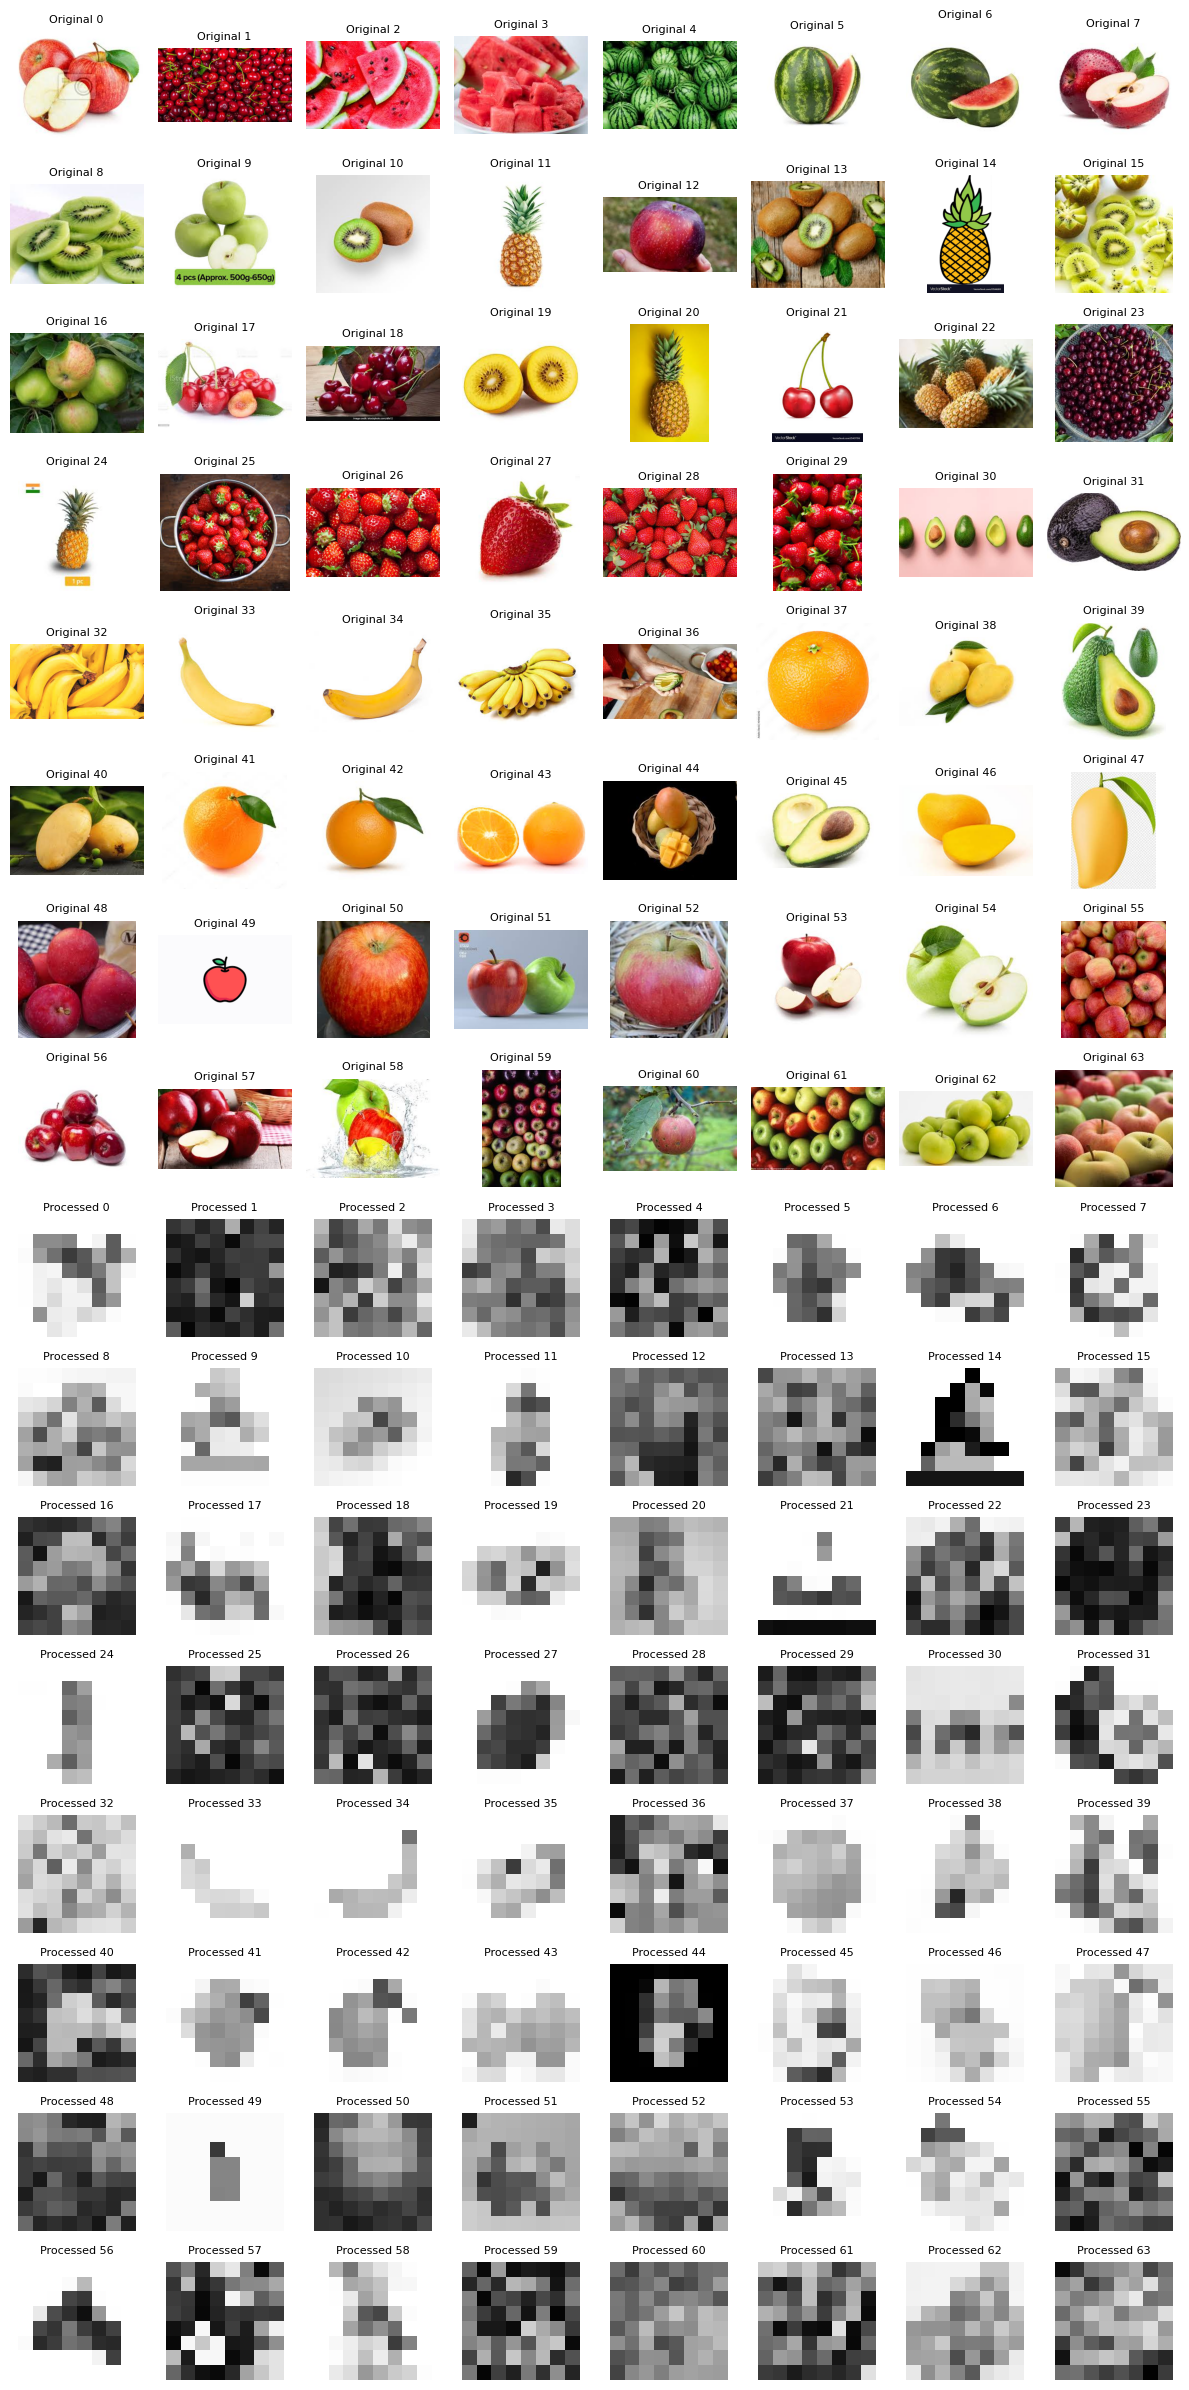

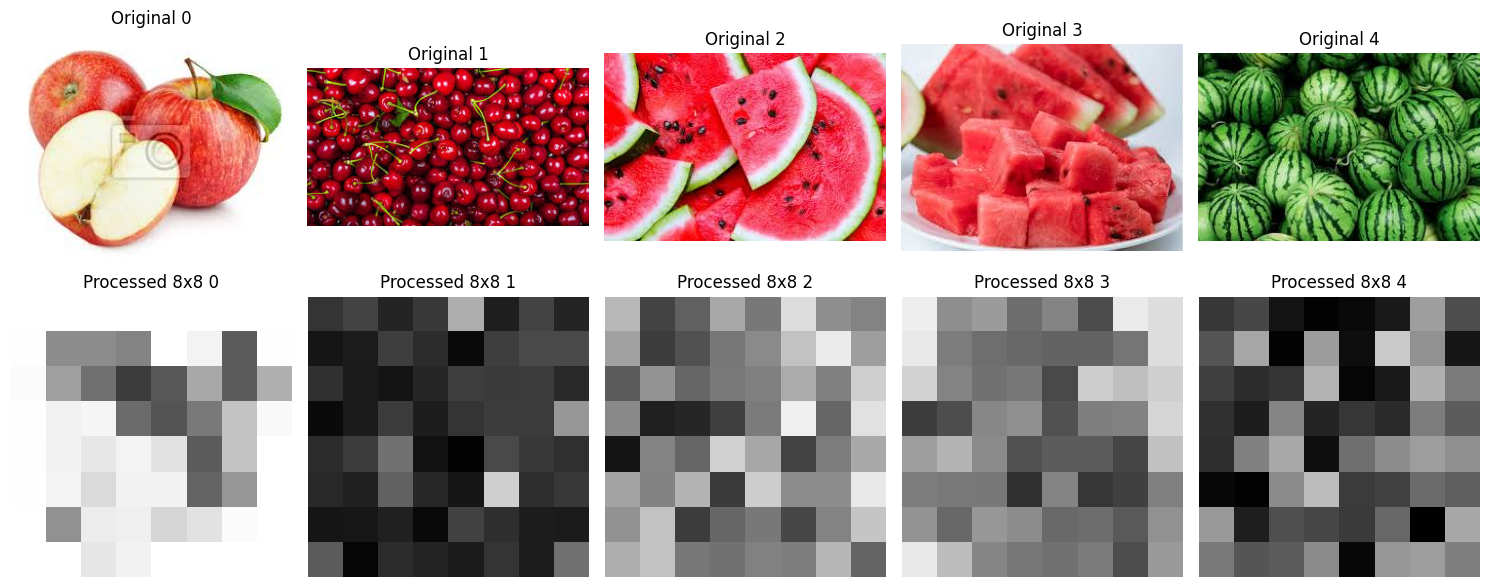


=== СТАТИСТИКА ===
Обработано изображений: 64
Размер оригинального изображения: (203, 249, 3)
Размер обработанного изображения: 8x8 (64 пикселя)
Коэффициент сжатия: ~789x


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def process_fruit_images(input_folder, output_folder):
    
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(Path(input_folder).rglob(f'*{ext}'))
        image_files.extend(Path(input_folder).rglob(f'*{ext.upper()}'))
    
    processed_images = []
    original_images = []  # Сохраняем оригинальные изображения
    
    for i, image_path in enumerate(image_files[:64]):
        try:
            img = cv2.imread(str(image_path))
            if img is None:
                continue
            
            # Сохраняем оригинальное изображение (конвертируем BGR в RGB для правильного отображения)
            original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            original_images.append(original_rgb)
            
            # Серый цвет
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Ресайзинг до 8x8 с интерполяцией
            resized = cv2.resize(gray, (8, 8), interpolation=cv2.INTER_LINEAR)
            
            output_path = os.path.join(output_folder, f'processed_{i:03d}.png')
            cv2.imwrite(output_path, resized)
            
            processed_images.append(resized)
                        
        except Exception as e:
            print(f"Ошибка при обработке {image_path}: {e}")
    
    return processed_images, original_images

def visualize_all_images(processed_images, original_images):
    
    if len(processed_images) == 0:
        print("Нет обработанных изображений для визуализации")
        return
    
    # Создаем большую фигуру с двумя сетками: оригиналы и обработанные
    fig, axes = plt.subplots(16, 8, figsize=(12, 24))
    
    # Верхняя половина: оригинальные изображения
    for i in range(64):
        if i < len(original_images):
            row = i // 8
            col = i % 8
            axes[row, col].imshow(original_images[i])
            axes[row, col].set_title(f'Original {i}', fontsize=8)
            axes[row, col].axis('off')
        else:
            row = i // 8
            col = i % 8
            axes[row, col].axis('off')
    
    # Нижняя половина: обработанные изображения 8x8
    for i in range(64):
        if i < len(processed_images):
            row = (i // 8) + 8  # Смещаем на 8 строк вниз
            col = i % 8
            axes[row, col].imshow(processed_images[i], cmap='gray', vmin=0, vmax=255)
            axes[row, col].set_title(f'Processed {i}', fontsize=8)
            axes[row, col].axis('off')
        else:
            row = (i // 8) + 8
            col = i % 8
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

def visualize_comparison(processed_images, original_images, num_samples=5):
    """Сравнение нескольких изображений до и после обработки"""
    
    if len(processed_images) == 0:
        return
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    
    for i in range(min(num_samples, len(processed_images))):
        # Оригинальные изображения (верхний ряд)
        axes[0, i].imshow(original_images[i])
        axes[0, i].set_title(f'Original {i}')
        axes[0, i].axis('off')
        
        # Обработанные изображения (нижний ряд)
        axes[1, i].imshow(processed_images[i], cmap='gray', vmin=0, vmax=255)
        axes[1, i].set_title(f'Processed 8x8 {i}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    input_folder = kagglehub.dataset_download("karimabdulnabi/fruit-classification10-class")
    output_folder = "processed_fruits"
        
    # Теперь функция возвращает и обработанные и оригинальные изображения
    processed_images, original_images = process_fruit_images(input_folder, output_folder)
    
    if processed_images:
        print(f"\nУспешно обработано {len(processed_images)} изображений")
        
        # Показываем все 64 оригинальных и 64 обработанных изображения
        visualize_all_images(processed_images, original_images)
        
        # Дополнительно показываем сравнение первых 5 изображений
        visualize_comparison(processed_images, original_images)
        
        # Статистика
        print(f"\n=== СТАТИСТИКА ===")
        print(f"Обработано изображений: {len(processed_images)}")
        if original_images:
            print(f"Размер оригинального изображения: {original_images[0].shape}")
            print(f"Размер обработанного изображения: 8x8 (64 пикселя)")
            print(f"Коэффициент сжатия: ~{original_images[0].shape[0] * original_images[0].shape[1] // 64}x")
        
if __name__ == "__main__":
    main()